# Explore Data Anlysis

In [6]:
import warnings
import os
warnings.filterwarnings('ignore')
# get all the paths
data_dir_list = os.listdir('dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("dataset"))
file_count = len(files)
# print(file_count)

['ganja', 'jarak_yodium', 'pepaya', 'singkong']


In [52]:
# make new base directory
original_dataset_dir = 'dataset'
base_dir = 'leaves-data'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [53]:
# create two folders in base_dir train and val
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# under train folder create 4 folder (ganja, singkong, pepaya, jarak_yodium)
train_ganja_dir = os.path.join(train_dir, 'ganja')
os.mkdir(train_ganja_dir)
train_singkong_dir = os.path.join(train_dir, 'singkong')
os.mkdir(train_singkong_dir)
train_pepaya_dir = os.path.join(train_dir, 'pepaya')
os.mkdir(train_pepaya_dir)
train_jarak_yodium_dir = os.path.join(train_dir, 'jarak_yodium')
os.mkdir(train_jarak_yodium_dir)

# under validation folder create 4 folder (ganja, singkong, pepaya, jarak_yodium)
validation_ganja_dir = os.path.join(validation_dir, 'ganja')
os.mkdir(validation_ganja_dir)
validation_singkong_dir = os.path.join(validation_dir, 'singkong')
os.mkdir(validation_singkong_dir)
validation_pepaya_dir = os.path.join(validation_dir, 'pepaya')
os.mkdir(validation_pepaya_dir)
validation_jarak_yodium_dir = os.path.join(validation_dir, 'jarak_yodium')
os.mkdir(validation_jarak_yodium_dir)

In [31]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[:valid_length]
    
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
    
    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [18]:
GANJA_SOURCE_DIR = 'dataset/ganja/'
TRAINING_GANJA_DIR = 'leaves-data/train/ganja/'
VALID_GANJA_DIR = 'leaves-data/validation/ganja/'

SINGKONG_SOURCE_DIR = 'dataset/singkong/'
TRAINING_SINGKONG_DIR = 'leaves-data/train/singkong/'
VALID_SINGKONG_DIR = 'leaves-data/validation/singkong/'

PEPAYA_SOURCE_DIR = 'dataset/pepaya/'
TRAINING_PEPAYA_DIR = 'leaves-data/train/pepaya/'
VALID_PEPAYA_DIR = 'leaves-data/validation/pepaya/'

JARAK_YODIUM_SOURCE_DIR = 'dataset/jarak_yodium/'
TRAINING_JARAK_YODIUM_DIR = 'leaves-data/train/jarak_yodium/'
VALID_JARAK_YODIUM_DIR = 'leaves-data/validation/jarak_yodium/'

In [54]:
import os
import random
from shutil import copyfile

split_size = 0.85

split_data(GANJA_SOURCE_DIR, TRAINING_GANJA_DIR, VALID_GANJA_DIR, split_size)
split_data(SINGKONG_SOURCE_DIR, TRAINING_SINGKONG_DIR, VALID_SINGKONG_DIR, split_size)
split_data(PEPAYA_SOURCE_DIR, TRAINING_PEPAYA_DIR, VALID_PEPAYA_DIR, split_size)
split_data(JARAK_YODIUM_SOURCE_DIR, TRAINING_JARAK_YODIUM_DIR, VALID_JARAK_YODIUM_DIR, split_size)

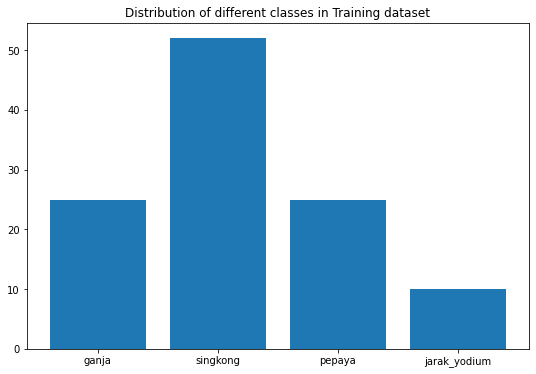

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['ganja', 'singkong', 'pepaya', 'jarak_yodium']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('leaves-data/train/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training dataset')
plt.show()

In [56]:
for i in image_folder:
    print('Total images in {} train folder: {}'.format(i, len(os.listdir('leaves-data/train/' + i + '/'))))

Total images in ganja train folder: 25
Total images in singkong train folder: 52
Total images in pepaya train folder: 25
Total images in jarak_yodium train folder: 10


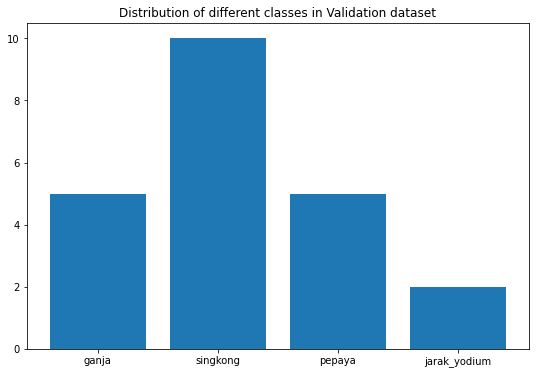

In [57]:
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('leaves-data/validation/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation dataset')
plt.show()

In [58]:
for i in image_folder:
    print('Total images in {} validation folder: {}'.format(i, len(os.listdir('leaves-data/validation/' + i + '/'))))

Total images in ganja validation folder: 5
Total images in singkong validation folder: 10
Total images in pepaya validation folder: 5
Total images in jarak_yodium validation folder: 2


# Deep Learning with Data Augmentation

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [40]:
img_width, img_height = 256, 256
batch_size = 16

In [59]:
TRAINING_DIR = 'leaves-data/train/'

train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    zoom_range=0.4,
                                    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_width, img_height))

Found 112 images belonging to 4 classes.


In [60]:
VALIDATION_DIR = 'leaves-data/validation/'

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                batch_size=batch_size,
                                                                class_mode='categorical',
                                                                target_size=(img_width, img_height))

Found 22 images belonging to 4 classes.


In [61]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best model
best_model_file = 'best_model.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [62]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_34 (Conv2D)          (None, 58, 58, 64)       

In [63]:
model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [64]:
history = model.fit_generator(train_generator,
                                epochs=30,
                                verbose=1,
                                validation_data=validation_generator,
                                callbacks=[best_model])

Epoch 1/30
7/7 [==============================] - 27s 3s/step - loss: 1.6663 - accuracy: 0.4375 - val_loss: 1.3708 - val_accuracy: 0.4545
Epoch 2/30
7/7 [==============================] - 19s 3s/step - loss: 1.2827 - accuracy: 0.4643 - val_loss: 1.8445 - val_accuracy: 0.4545
Epoch 3/30
7/7 [==============================] - 18s 3s/step - loss: 1.3906 - accuracy: 0.4643 - val_loss: 1.3389 - val_accuracy: 0.4545
Epoch 4/30
7/7 [==============================] - 20s 3s/step - loss: 1.3378 - accuracy: 0.4643 - val_loss: 1.3324 - val_accuracy: 0.4545
Epoch 5/30
7/7 [==============================] - 18s 2s/step - loss: 1.3250 - accuracy: 0.4643 - val_loss: 1.2823 - val_accuracy: 0.4545
Epoch 6/30
7/7 [==============================] - 17s 2s/step - loss: 1.2673 - accuracy: 0.4643 - val_loss: 1.2459 - val_accuracy: 0.4545
Epoch 7/30
7/7 [==============================] - 18s 3s/step - loss: 1.2567 - accuracy: 0.4643 - val_loss: 1.2514 - val_accuracy: 0.4545
Epoch 8/30
7/7 [==================

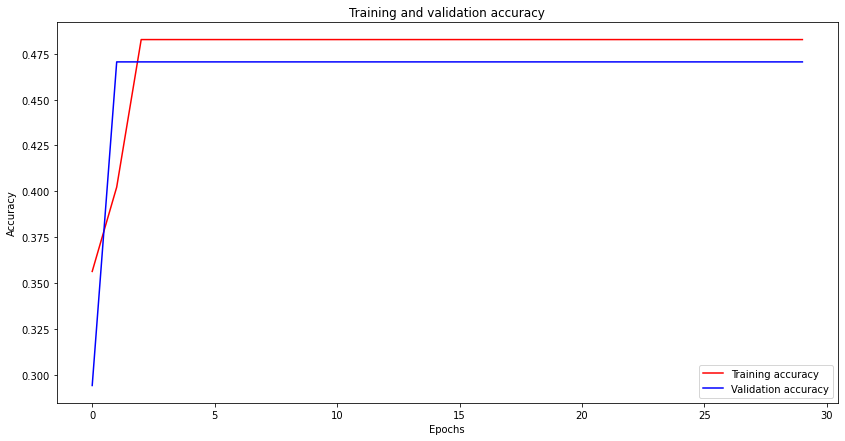

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

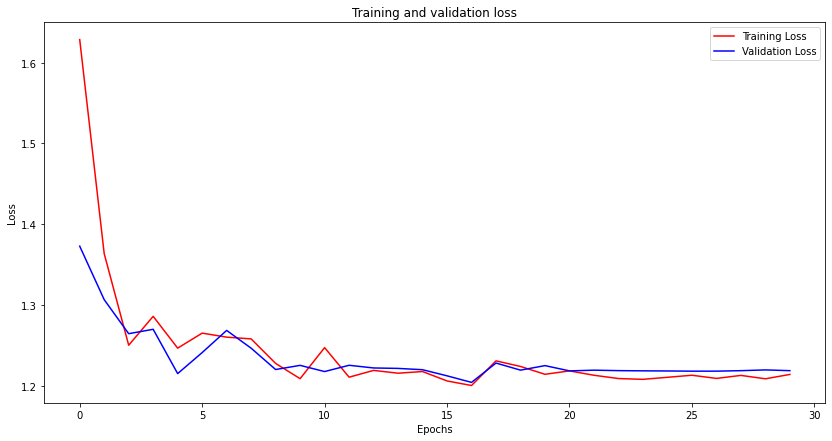

In [51]:
fig2 = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.show()